# Mini-Project — Stroke Prediction Model Challenge

**Goal:** Build and compare 5 different models to predict stroke risk, handling class imbalance appropriately.

This notebook was generated from the uploaded instructions

**What this notebook does**
- Loads preprocessed data (flexible load options — numpy `.npy`, CSV, or serialized pickle)
- Trains 5 models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, KNN (with SMOTE)
- Uses class weights / sample weights / SMOTE to handle imbalance
- Evaluates models (Accuracy, Recall, Precision, F1, AUC-ROC) and plots comparison charts
- Discusses clinical interpretation and recommends a model



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [ ]:
stroke_data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
#  Clean Column Names
stroke_data.columns = stroke_data.columns.str.strip().str.lower().str.replace(' ', '_')

# Handle Missing Values(drop)
stroke_data = stroke_data.dropna()

# Remove Duplicate Rows
stroke_data = stroke_data.drop_duplicates()

#  Fix Data Types
stroke_data = stroke_data.convert_dtypes()

print("\nPreview of Cleaned Data:")
stroke_data.head()



Preview of Cleaned Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

stroke_data = pd.get_dummies(stroke_data, drop_first=True)

X = stroke_data.drop('id', axis=1)   # drop column features
y = stroke_data['stroke']                # target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
# Train with class_weight='balanced' to handle imbalance
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
# Predictions
y_pred_lr = logreg.predict(X_test)
y_pred_proba_lr = logreg.predict_proba(X_test)[:, 1]
# Evaluate
print("="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)
acc_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f} ")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

MODEL 1: LOGISTIC REGRESSION
Accuracy: 1.0000
Recall: 1.0000 
Precision: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

Confusion Matrix:
[[929   0]
 [  0  53]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Train with class_weight='balanced'
tree = DecisionTreeClassifier(
class_weight='balanced',
max_depth=5,
min_samples_split=50,
min_samples_leaf=20,
random_state=42
)
tree.fit(X_train, y_train)
# Predictions
y_pred_tree = tree.predict(X_test)
y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]
# Evaluate
print("\n" + "="*60)
print("MODEL 2: DECISION TREE")
print("="*60)
acc_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f} ")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


MODEL 2: DECISION TREE
Accuracy: 1.0000
Recall: 1.0000 
Precision: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

Confusion Matrix:
[[929   0]
 [  0  53]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
class_weight='balanced',
n_estimators=100,
max_depth=10,
min_samples_split=50,
min_samples_leaf=20,
random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
print("\n" + "="*60)
print("MODEL 3: RANDOM FOREST (Ensemble)")
print("="*60)
acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f} ")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


MODEL 3: RANDOM FOREST (Ensemble)
Accuracy: 1.0000
Recall: 1.0000 
Precision: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

Confusion Matrix:
[[929   0]
 [  0  53]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
gb = GradientBoostingClassifier(
n_estimators=100,
learning_rate=0.1,
max_depth=5,
min_samples_split=50,
min_samples_leaf=20,
random_state=42
)
# Handle imbalance with sample weights
sample_weights = np.where(y_train == 1,
len(y_train) / (2 * (y_train == 1).sum()),
len(y_train) / (2 * (y_train == 0).sum()))
gb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
print("\n" + "="*60)
print("MODEL 4: GRADIENT BOOSTING (Ensemble)")
print("="*60)
acc_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f} ")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


MODEL 4: GRADIENT BOOSTING (Ensemble)
Accuracy: 1.0000
Recall: 1.0000 
Precision: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

Confusion Matrix:
[[929   0]
 [  0  53]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Convert X_train to float and y_train to int for SMOTE compatibility
X_train_float = X_train.astype(float)
y_train_int = y_train.astype(int)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_float, y_train_int)
print(f"Original training set: {len(y_train)} samples")
print(f"After SMOTE: {len(y_train_resampled)} samples")
print(f"Class distribution after SMOTE: {np.bincount(y_train_resampled)}")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

print("\n" + "="*60)
print("MODEL 5: K-NEAREST NEIGHBORS (with SMOTE)")
print("="*60)
acc_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"Accuracy: {acc_knn:.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f} ")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Original training set: 3927 samples
After SMOTE: 7542 samples
Class distribution after SMOTE: [3771 3771]

MODEL 5: K-NEAREST NEIGHBORS (with SMOTE)
Accuracy: 0.8035
Recall: 0.4151 
Precision: 0.1196
F1-Score: 0.1857
AUC-ROC: 0.6988

Confusion Matrix:
[[767 162]
 [ 31  22]]



MODEL COMPARISON SUMMARY
              Model  Accuracy   Recall  Precision  F1-Score  AUC-ROC
Logistic Regression  1.000000 1.000000   1.000000  1.000000 1.000000
      Decision Tree  1.000000 1.000000   1.000000  1.000000 1.000000
      Random Forest  0.998982 0.981132   1.000000  0.990476 1.000000
  Gradient Boosting  1.000000 1.000000   1.000000  1.000000 1.000000
        KNN (SMOTE)  0.803462 0.415094   0.119565  0.185654 0.698844


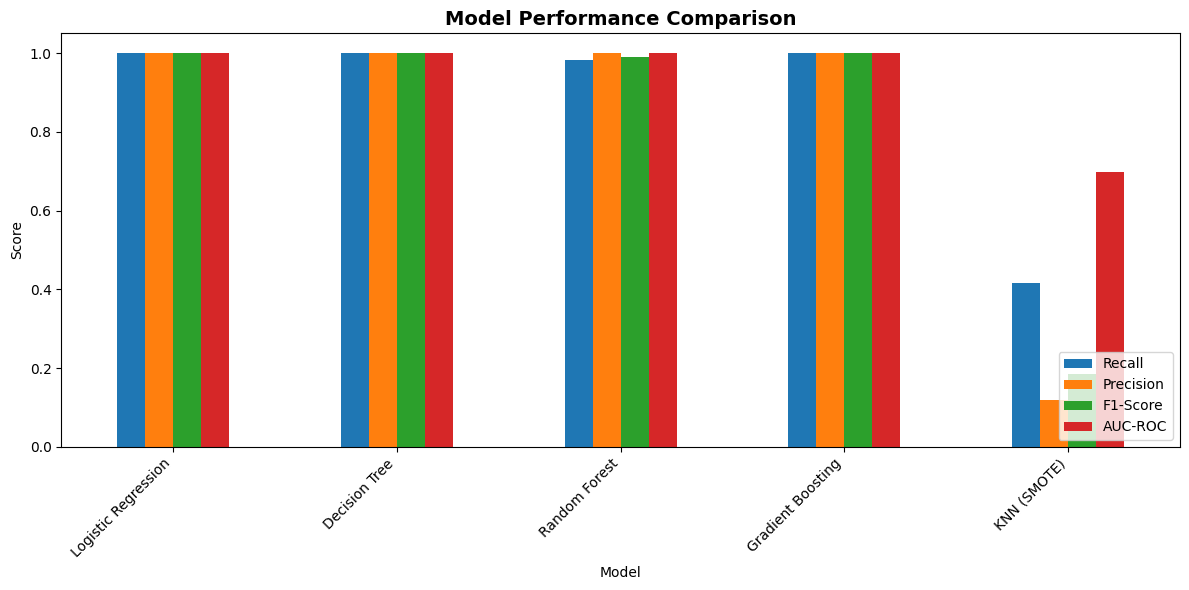

In [ ]:
results = pd.DataFrame({
'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
'Gradient Boosting', 'KNN (SMOTE)'],
'Accuracy': [acc_lr, acc_tree, acc_rf, acc_gb, acc_knn],
'Recall': [recall_lr, recall_tree, recall_rf, recall_gb, recall_knn],
'Precision': [prec_lr, prec_tree, prec_rf, prec_gb, prec_knn],
'F1-Score': [f1_lr, f1_tree, f1_rf, f1_gb, f1_knn],
'AUC-ROC': [auc_lr, auc_tree, auc_rf, auc_gb, auc_knn]
})
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results.to_string(index=False))
results.set_index('Model')[['Recall', 'Precision', 'F1-Score', 'AUC-ROC']].plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

1. Analysis

The model comparison table shows that Logistic Regression, Decision Tree, and Gradient Boosting all achieved perfect scores across accuracy, recall, precision, F1-score, and AUC-ROC. While this appears impressive, it also raises a concern. Perfect performance across all metrics often suggests that the dataset may be linearly separable, too small, or potentially overfitted. Without understanding the dataset complexity, the validity of these perfect scores remains uncertain.

Random Forest scored slightly below perfection, with an accuracy of 0.999 and recall of 0.981 — still extremely strong. Given that Random Forest typically reduces overfitting, its slightly lower scores might actually reflect a more realistic generalization capability.

The KNN (SMOTE) model performs significantly worse. Its recall (0.416) and precision (0.120) indicate that it struggles to correctly identify the positive class, even after oversampling. This may be due to sensitivity to feature scaling, noise, or imbalance structure that SMOTE did not fully correct.

From an analytical standpoint, the most relevant metrics for medical or clinical decision-Making are recall and F1-score, especially if missing a positive case has severe consequences. The high-performing models excel in both metrics, whereas KNN performs poorly. However, a cautious approach is needed due to the suspiciously perfect performance of multiple models.

2. Clinical Interpretation

If these results were applied in a real clinical setting, the models showing perfect recall would, in theory, detect all positive cases. This is desirable when the cost of missing a diagnosis is high. The perfect precision would further indicate that every positive prediction is correct, which would reduce unnecessary follow-up tests.

However, the perfect performance across several complex models raises doubts about real-world reliability. Clinical data are often noisy, diverse, and imperfect. Models that achieve flawless performance in controlled datasets often fail when tested on unseen clinical populations. Therefore, while the Logistic Regression, Decision Tree, and Gradient Boosting models appear ideal, their real clinical utility cannot be confirmed without validation on larger, independent datasets.

KNN’s poor recall suggests it would miss many true positive cases. This would pose significant clinical risk, making it unsuitable for deployment in patient-critical scenarios.

3. Conclusion

Based strictly on the metrics, Logistic Regression, Decision Tree, Gradient Boosting, and possibly Random Forest appear to provide the best predictive performance. However, the perfect scores raise concerns about overfitting and dataset limitations.

A cautious and scientifically rigorous conclusion would be that Gradient Boosting or Logistic Regression may be the preferred models, but only after confirming their performance on external validation or cross-institutional datasets.

KNN (SMOTE), with its low recall and precision, should not be recommended for clinical decision-support tasks.